In [ ]:
!pip3 install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data preproccesing 

In [ ]:
from torch import all

import fastai
print(fastai.__version__)
!pip install fastai --upgrade


2.7.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastai.vision.all import *
import torch

In [ ]:
image_path = "/content/drive/My Drive/New_Masks_Dataset"

In [ ]:
data = ImageDataLoaders.from_folder(image_path,train='Train',valid='Validation',item_tfms=Resize(128),bs=30,num_workers=8)
image_files = get_image_files(image_path)
len(image_files)
data.show_batch()


TypeError: ignored

In [ ]:
print(data.c)
print(len(data.train_ds))
print(len(data.valid_ds))

2
600
306


# MLP Model

MLP Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class mlp_nn(nn.Module):
    def __init__(self):
        super(mlp_nn, self).__init__()
        self.lin1 = nn.Linear(128*128*3, 6 * 30* 30) 
        self.fc1 = nn.Linear(6 * 30* 30, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x, **kwargs):
        x = x.view(-1, 128*128*3)
        x = F.relu(self.lin1(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x



net = mlp_nn()



Train


epoch,train_loss,valid_loss,error_rate,time
0,5.931175,2.330641,0.473856,00:43
1,2.884963,2.030941,0.480392,00:16
2,2.141651,2.009301,0.434641,00:17
3,1.590829,0.903848,0.294118,00:17
4,1.198774,0.771875,0.294118,00:16
5,0.956366,1.285768,0.428105,00:16
6,0.786668,0.570088,0.222222,00:19
7,0.683573,0.581094,0.248366,00:18
8,0.606584,0.660324,0.323529,00:17
9,0.545454,0.533965,0.225490,00:16


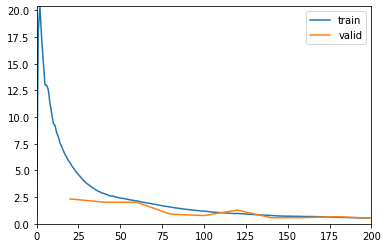

In [ ]:
learn = Learner(data, mlp_nn(), metrics=error_rate)
learn.fit(10, 0.001,cbs=[ShowGraphCallback()])

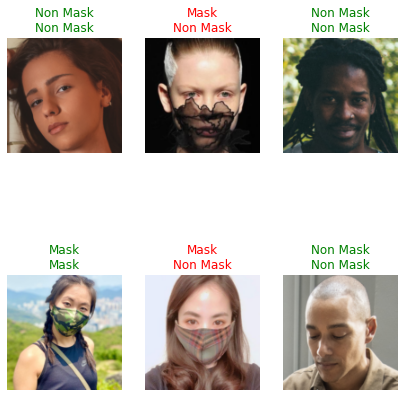

In [ ]:
learn.show_results(max_n = 6, figsize=(7,8))

Calculating Accuracy 

In [ ]:
from sklearn.metrics import accuracy_score
validationset_labels = [xy[-1] for xy in data[1].dataset]
pred_probas, _, pred_classes = learn.get_preds(dl=data[1], with_decoded=True)

acc = accuracy_score(validationset_labels,pred_classes)
print("Accuracy of the model:", acc)

Accuracy of the model: 0.7745098039215687


Confusion matrix

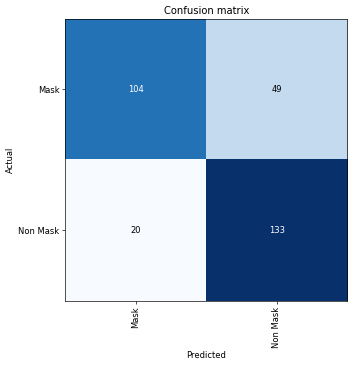

In [ ]:
stats = ClassificationInterpretation.from_learner(learn)
stats.plot_confusion_matrix(figsize=(6,6),dpi=60)

## ALEXNET

### from scratch (without learning rate finder)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 286MB/s]


epoch,train_loss,valid_loss,f1_score,time
0,4.702626,4.698184,0.000399,08:34
1,4.679357,4.678783,0.000191,00:21
2,4.679849,4.673440,0.000399,00:21
3,4.677317,4.675247,0.000142,00:21
4,4.670705,4.673544,0.000399,00:21
5,4.672833,4.675252,0.000232,00:21
6,4.677353,4.673353,0.000399,00:21
7,4.671085,4.672015,0.000142,00:21
8,4.676695,4.672199,0.000399,00:21
9,4.680773,4.673332,0.000399,00:21


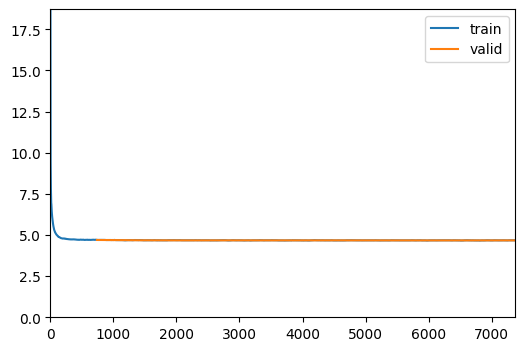

In [ ]:
learn_alexnet = Learner(data, alexnet(pretrained='false'), metrics=error_rate)

learn_alexnet.fit(10, 0.001,cbs=[ShowGraphCallback()])

### from scratch (with learning rate finder)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=7.585775892948732e-05)

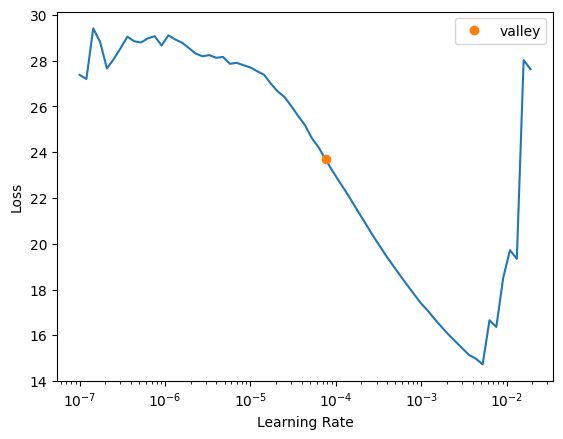

In [ ]:
# with learning rate finder
learn_alexnet = Learner(data, alexnet(pretrained='false'), metrics=error_rate)
learn_alexnet.lr_find()

epoch,train_loss,valid_loss,f1_score,time
0,2.918030,2.659119,0.291351,02:06
1,2.348787,2.315975,0.383494,02:05
2,2.015114,2.257293,0.387804,02:06
3,1.600969,2.268128,0.401707,02:02
4,1.377105,2.296001,0.410546,02:00
5,1.086066,2.377155,0.412303,01:57
6,0.918991,2.560718,0.414497,01:55
7,0.720463,2.739705,0.419713,02:02


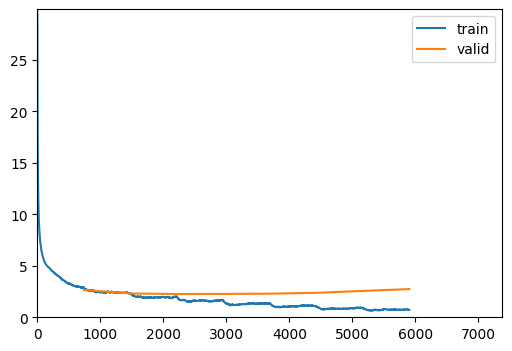

epoch,train_loss,valid_loss,f1_score,time
0,2.918030,2.659119,0.291351,02:06
1,2.348787,2.315975,0.383494,02:05
2,2.015114,2.257293,0.387804,02:06
3,1.600969,2.268128,0.401707,02:02
4,1.377105,2.296001,0.410546,02:00
5,1.086066,2.377155,0.412303,01:57
6,0.918991,2.560718,0.414497,01:55
7,0.720463,2.739705,0.419713,02:02


In [ ]:
lr = 7.585775892948732e-05
learn_alexnet.fit(10, lr,cbs=[ShowGraphCallback()])

### fine tuning

SuggestedLRs(valley=0.001737800776027143)

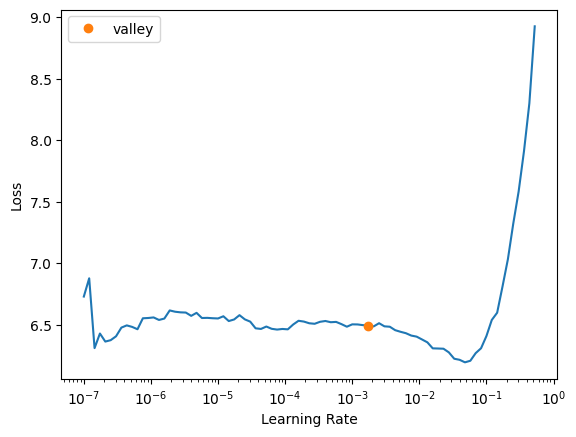

In [ ]:
learn_alexnet = vision_learner(data, alexnet, metrics=error_rate)
learn_alexnet.lr_find()

epoch,train_loss,valid_loss,error_rate,time
0,3.691943,2.904975,0.730691,01:58


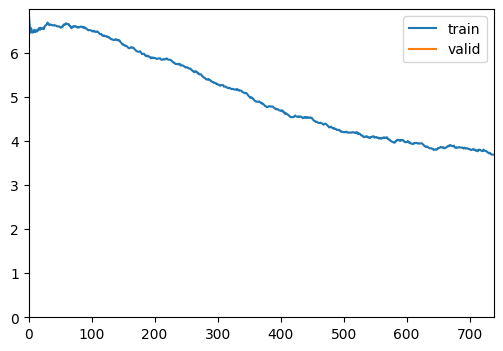

epoch,train_loss,valid_loss,error_rate,time
0,3.104696,2.456614,0.636179,01:59
1,2.818354,2.326808,0.610434,01:59
2,2.624228,2.253625,0.600949,02:01
3,2.435823,2.184758,0.587737,01:59
4,2.158657,2.152158,0.575203,01:59
5,1.924529,2.067079,0.552168,02:01
6,1.600087,2.068758,0.553184,01:57
7,1.483204,2.010691,0.534214,01:51


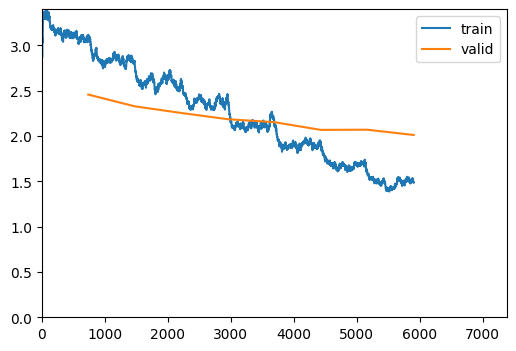

epoch,train_loss,valid_loss,error_rate,time
0,3.104696,2.456614,0.636179,01:59
1,2.818354,2.326808,0.610434,01:59
2,2.624228,2.253625,0.600949,02:01
3,2.435823,2.184758,0.587737,01:59
4,2.158657,2.152158,0.575203,01:59
5,1.924529,2.067079,0.552168,02:01
6,1.600087,2.068758,0.553184,01:57
7,1.483204,2.010691,0.534214,01:51
8,1.365376,2.018005,0.531165,01:51


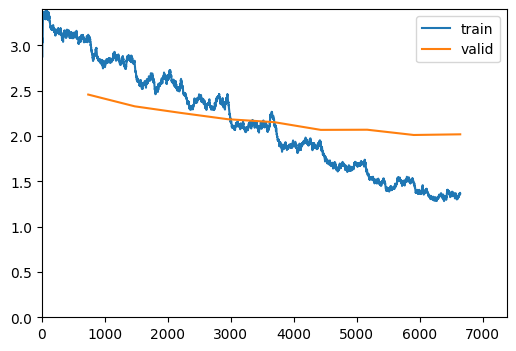

In [ ]:
learn_alexnet = vision_learner(dls, alexnet, metrics=error_rate)
lr = 0.001737800776027143
learn_alexnet.fine_tune(10, lr,cbs=[ShowGraphCallback()])

## VGG

### from scratch (without learning rate finder)



In [ ]:
learn_vgg16 = Learner(data, vgg16(pretrained='false'), metrics=error_rate)

learn_vgg16.fit(10, 0.001,cbs=[ShowGraphCallback()])

NameError: ignored

### from scratch (with learning rate finder)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 373MB/s]


SuggestedLRs(valley=4.365158383734524e-05)

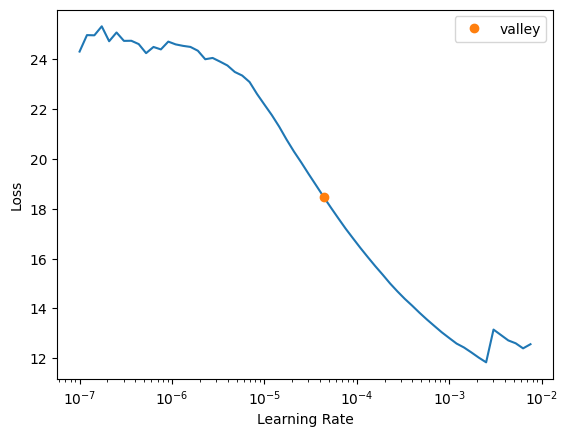

In [ ]:
learn_vgg16 = Learner(data, vgg16(pretrained='false'), metrics=error_rate)
learn_vgg16.lr_find()

epoch,train_loss,valid_loss,f1_score,time
0,4.159845,3.777005,0.103561,00:27
1,2.431265,2.048371,0.427316,00:26
2,1.711733,1.656094,0.524550,00:26
3,1.249792,1.564785,0.560995,00:26
4,0.959173,1.510040,0.588489,00:27
5,0.730041,1.391748,0.617782,00:27
6,0.593327,1.566021,0.606604,00:27
7,0.442774,1.683695,0.608912,00:27
8,0.360541,1.669225,0.607736,00:27
9,0.308040,1.919148,0.617615,00:27


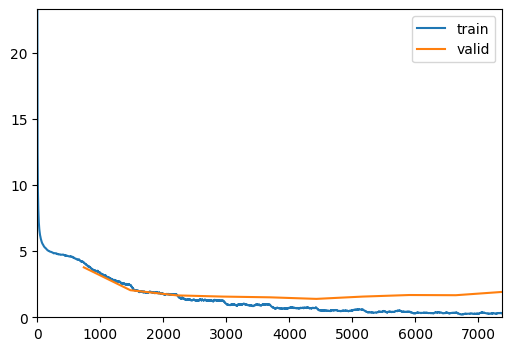

In [ ]:
lr = 4.365158383734524e-05

learn_vgg16.fit(10, lr,cbs=[ShowGraphCallback()])

### fine tuning

In [ ]:
learn_vgg16 = vision_learner(data, vgg16, metrics=error_rate)
learn_vgg16.lr_find()

In [ ]:
lr = 0.0014
learn_vgg16.fine_tune(10, lr,cbs=[ShowGraphCallback()])

## DENSENET

### Densenet 121

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 308MB/s]


SuggestedLRs(valley=0.0004786300996784121)

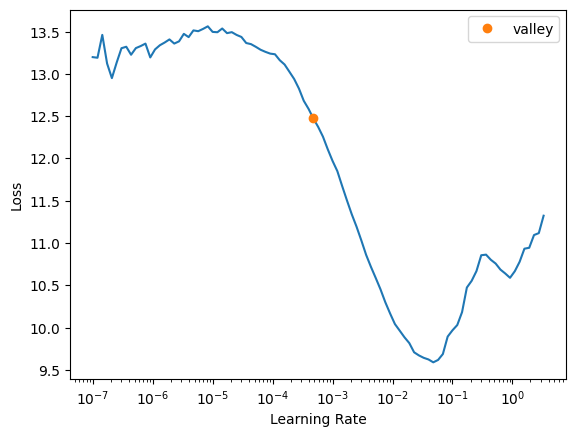

In [ ]:
# with learning rate finder
densenet121 = Learner(data, densenet121(pretrained='false'), metrics=error_rate)
densenet121.lr_find()

epoch,train_loss,valid_loss,f1_score,time
0,2.874598,3.139129,0.227418,01:29
1,2.201733,1.983576,0.447681,01:27
2,1.800115,1.976346,0.460540,01:28
3,1.499811,1.869710,0.499751,01:28
4,1.262138,1.892942,0.511900,01:28
5,1.132841,1.841915,0.517413,01:28
6,0.919723,2.008601,0.515394,01:28
7,0.849256,1.954676,0.521568,01:27
8,0.760456,1.956049,0.551462,01:27
9,0.603629,1.890799,0.559782,01:28


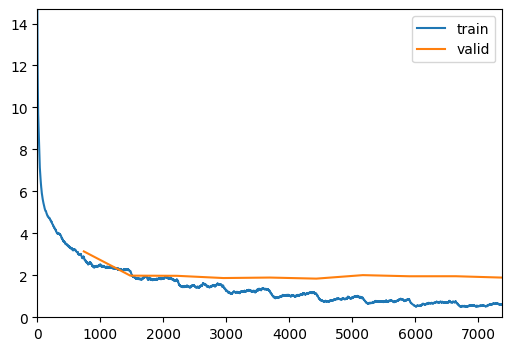

In [ ]:
lr = 0.0004786300996784121

densenet121.fit(10, lr,cbs=[ShowGraphCallback()])

#### fine tuning

In [ ]:
learn_densenet121 = vision_learner(data, densenet121, metrics=error_rate)
learn_densenet121.lr_find()

In [ ]:
lr = 0.0014
learn_densenet121.fine_tune(10, lr,cbs=[ShowGraphCallback()])

### Densenet 161

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:03<00:00, 34.7MB/s]


SuggestedLRs(valley=0.0002290867705596611)

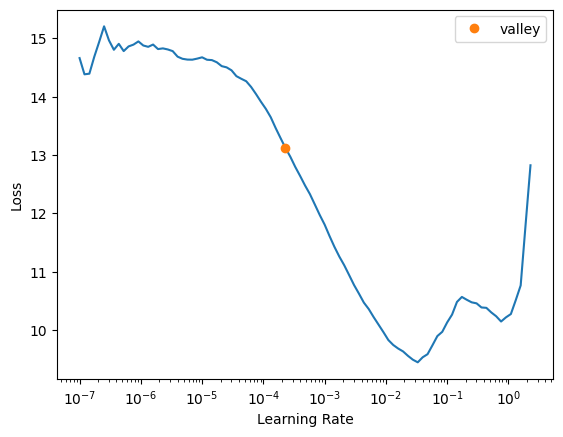

In [ ]:
# with learning rate finder
densenet161 = Learner(data, densenet161(pretrained='false'), metrics=error_rate)
densenet161.lr_find()

epoch,train_loss,valid_loss,f1_score,time
0,2.094577,2.084348,0.439510,01:57
1,1.576198,1.710375,0.525787,01:55
2,1.154606,1.507807,0.611001,01:55
3,0.905891,1.574111,0.604365,01:56
4,0.752945,1.698872,0.576847,01:55
5,0.669161,2.009027,0.544557,01:56
6,0.466321,1.877134,0.590321,01:58
7,0.474073,2.128924,0.549788,01:57
8,0.392099,1.915831,0.575350,01:58
9,0.351610,1.865963,0.583460,01:57


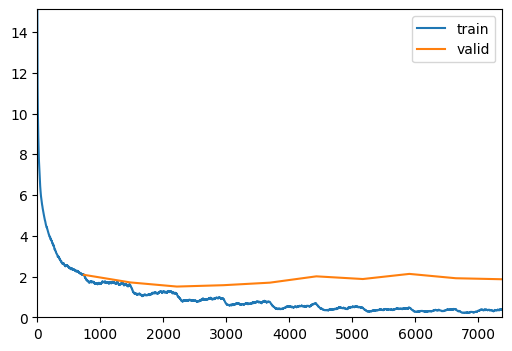

In [ ]:
lr = 0.0002290867705596611

densenet161.fit(10, lr,cbs=[ShowGraphCallback()])

#### fine tuning


In [ ]:
learn_densenet161 = vision_learner(data, densenet161, metrics=error_rate)
learn_densenet161.lr_find()

In [ ]:
lr = 0.0014
learn_densenet161.fine_tune(10, lr,cbs=[ShowGraphCallback()])

# Resnet


# Image agumentation

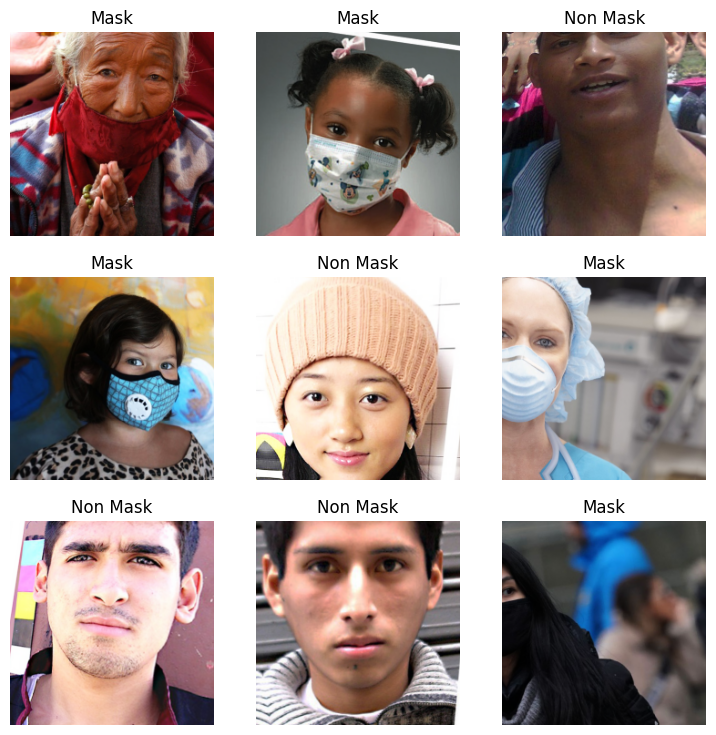

In [ ]:
# agumenting the images to do fliip  and rotaing 

data = ImageDataLoaders.from_folder(image_path, train='Train', valid='Validation', item_tfms=Resize(460),bs=30, shuffle=True, batch_tfms=aug_transforms(size=224,do_flip = True, max_rotate = 10), num_workers=8)
image_files = get_image_files(image_path)
len(image_files)
data.show_batch()

Resnet Fine tuneing

# Fine Tuning with Resnet 18

In [ ]:
resnet_model = cnn_learner(data, resnet18, metrics=error_rate)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

In [ ]:
resnet_model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.630929,0.228588,0.071895,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.097562,0.073601,0.029412,00:21


SuggestedLRs(valley=0.00015848931798245758)

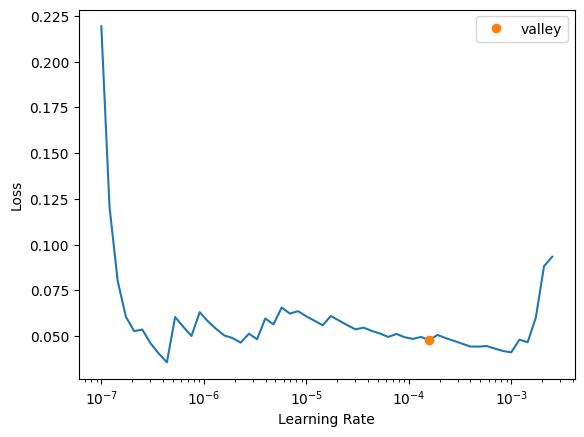

In [ ]:
resnet_model.unfreeze()
resnet_model.lr_find()

epoch,train_loss,valid_loss,error_rate,time
0,0.021926,0.056336,0.013072,00:21
1,0.017232,0.070509,0.026144,00:20
2,0.018006,0.041180,0.013072,00:21
3,0.010943,0.048390,0.016340,00:20
4,0.008208,0.044390,0.013072,00:22


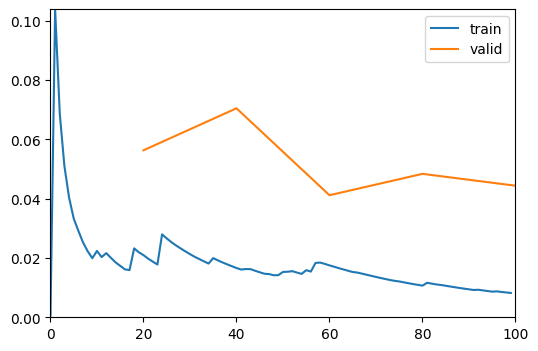

In [ ]:
# fine tuning resnet 
resnet_model.fit_one_cycle(5, 1e-4,cbs=[ShowGraphCallback()])

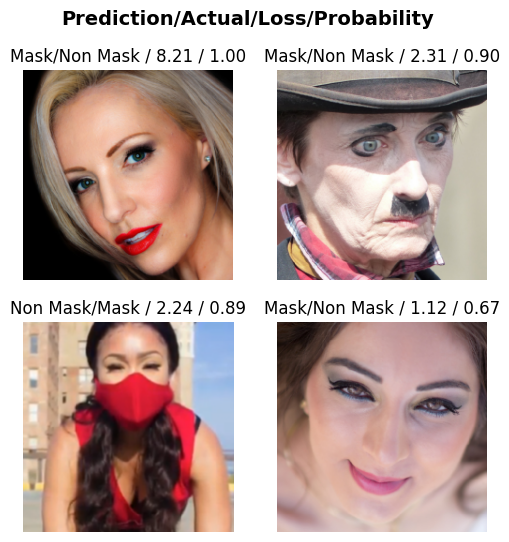

In [ ]:
interp = Interpretation.from_learner(resnet_model)
interp.plot_top_losses(4)

# Accuracy on the validation set

In [ ]:
from sklearn.metrics import accuracy_score
validationset_labels = [xy[-1] for xy in data[1].dataset]
pred_probas, _, pred_classes = resnet_model.get_preds(dl=data[1], with_decoded=True)

acc = accuracy_score(validationset_labels,pred_classes)
print("Accuracy of the model:", acc)

Accuracy of the model: 0.9869281045751634


# Confusion Metrics 

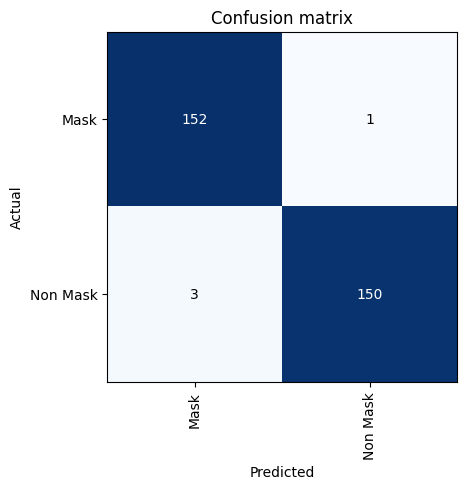

In [ ]:
interp = ClassificationInterpretation.from_learner(resnet_model)
interp.plot_confusion_matrix()

In [ ]:
resnet_model.save('Face Mask Dectection Model')

Path('/content/drive/My Drive/New_Masks_Dataset/models/Face Mask Dectection Model.pth')